#  Bank Churn Prediction (SQL + Power BI + Machine Learning)

## **Project Overview**  
This project demonstrates an end-to-end data science workflow integrating:  

- **SQL** for data cleaning & transformation  
- **Power BI** for interactive dashboarding & churn analysis  
- **Machine Learning (Random Forest)** for predicting whether a bank customer will exit (close their account)  

The dataset contains customer demographic details, account information, and transaction-related features.  

---

## **Objectives**  
- Clean and prepare raw bank churn data using SQL.  
- Build an interactive Power BI dashboard for churn insights.  
- Train classification models to predict the **Exited** status based on customer data.  
- Save the best model for deployment using **joblib**.  

---

## **Tech Stack**  
- **Database:** MySQL  
- **Visualization:** Power BI  
- **Programming Language:** Python  
- **Libraries:** pandas, numpy, seaborn, scikit-learn, xgboost, joblib  

---

## **Dataset Features**  

| Column | Description |
|--------|-------------|
| CustomerId | Unique customer identifier |
| Surname | Customer’s surname |
| CreditScore | Customer’s credit score |
| Geography | Country of the customer |
| Gender | Male/Female |
| Age | Customer's age |
| Tenure | Years the customer has been with the bank |
| Balance | Account balance |
| NumOfProducts | Number of products held at the bank |
| HasCrCard | Has a credit card (1 = Yes, 0 = No) |
| IsActiveMember | Active account holder (1 = Yes, 0 = No) |
| EstimatedSalary | Annual salary estimate |
| Card_Type | Type of bank card (Gold, Silver, etc.) |
| Point_Earned | Reward points earned |
| Satisfaction_Score | Customer satisfaction rating |
| Exited | Target variable (1 = Exited, 0 = Retained) |

---

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib


## **Step 1: Load and Inspect Data**  
We load the cleaned churn dataset (after SQL preprocessing) into a Pandas DataFrame for further ML processing.  

---

In [144]:
data = pd.read_csv('Customer-Churn-Processed.csv')

## **Step 2: Data Preprocessing**  

The dataset was already cleaned and partially preprocessed in MySQL:  
- Removed duplicates and null values  
- Encoded categorical variables such as **Gender** and **Geography**  
- Extracted additional features like card types and points earned  

In Python, we performed:  
- One-hot encoding of categorical features (e.g., Geography, Card_Type)  
- Removed *non-predictive or target-leaking columns*, including:  
  - **Complain** → Strong direct relationship with churn; removed to prevent data leakage  
  - Identifier columns (**CustomerId**, **Surname**)  
- Standardized numerical features using **StandardScaler**  
- Prepared features (*X*) and target (*y*) for ML model training  

*Train-Test Split:*  
- 80% of the data for training  
- 20% for testing  

---

In [145]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Card_Type', 'Point_Earned',
       'Gender_code', 'age_group', 'Geo_France', 'Geo_Spain', 'Geo_Germany',
       'Card_Gold', 'Card_Silver', 'Card_Platinum', 'Card_Diamond'],
      dtype='object')

In [146]:
data = data.drop(['Geography','Gender','Card_Type','age_group','Complain'], axis=1)

In [147]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction_Score,Point_Earned,Gender_code,Geo_France,Geo_Spain,Geo_Germany,Card_Gold,Card_Silver,Card_Platinum,Card_Diamond
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,0,1,0,0,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,0,1,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,0,1,0,0,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,1,0,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,0,1,0,0,0


In [148]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101,shuffle=True)

## **Step 3: Train Multiple Classification Models**  
We trained and compared multiple classification algorithms:  
- Logistic Regression  
- Support Vector Classifier (SVC)  
- K Nearest Neighbors (KNN)  
- Decision Tree Classifier (DTC)  
- Random Forest Classifier (RF)  
- Gradient Boosting Classifier (GBC)  
- XGBoost Classifier (XGB)  
- AdaBoost Classifier (ADA)  

We evaluated them using **accuracy score** to select the best-performing model.  

---


In [151]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

svr = SVC()
svr.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

xg = XGBClassifier()
xg.fit(X_train,y_train)

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)


,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [152]:
y_pred1 = lr.predict(X_test)
y_pred2 = kn.predict(X_test)
y_pred3 = svr.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)
y_pred7 = xg.predict(X_test)
y_pred8 = ada.predict(X_test)

In [153]:
score1 = accuracy_score(y_test,y_pred1)
score2 = accuracy_score(y_test,y_pred2)
score3 = accuracy_score(y_test,y_pred3)
score4 = accuracy_score(y_test,y_pred4)
score5 = accuracy_score(y_test,y_pred5)
score6 = accuracy_score(y_test,y_pred6)
score7 = accuracy_score(y_test,y_pred7)
score8 = accuracy_score(y_test,y_pred8)

In [154]:
print(score1,score2,score3,score4,score5,score6,score7,score8)

0.804 0.8145 0.8565 0.795 0.867 0.865 0.856 0.8565


In [155]:
final_data = pd.DataFrame({'Models':['LR',"SVC",'KNN','DTC','RF','GBC','XGB','ADA'],
             'ACCURACY':[score1,score2,score3,score4,score5,score6,score7,score8]})

In [156]:
final_data

,Models,ACCURACY
0,LR,0.8040
1,SVC,0.8145
2,KNN,0.8565
3,DTC,0.7950
4,RF,0.8670
5,GBC,0.8650
6,XGB,0.8560
7,ADA,0.8565


## **Model Performance Comparison**  
The chart below shows accuracy scores for each model — higher is better.  
Random Forest achieved the highest accuracy (~87%) **after removing the *Complain* feature to ensure fairness and prevent leakage**.  

---

<Axes: xlabel='Models', ylabel='ACCURACY'>

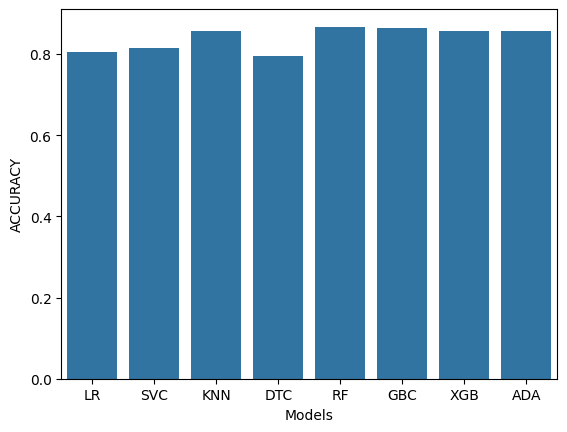

In [157]:
sns.barplot(x = final_data['Models'],y = final_data['ACCURACY'])

## **Step 4: Save Best Model**  
We selected the **Random Forest Classifier** as the final model and saved it using **joblib** for deployment.  

---

In [158]:
joblib.dump(rf,'bank_churn')

['bank_churn']

In [159]:
model = joblib.load('bank_churn')

## **Step 5: Predict on New Unseen Data**  
We passed new customer records to the trained model to predict whether each customer is likely to exit.  

---

In [160]:
columns = [
    "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard",
    "IsActiveMember", "EstimatedSalary", "Satisfaction_Score", "Point_Earned",
    "Gender_code", "Geo_France", "Geo_Spain", "Geo_Germany",
    "Card_Gold", "Card_Silver", "Card_Platinum", "Card_Diamond"
]

unseen_data = [
    [720, 35, 6, 25000.00, 1, 1, 1, 85000.00, 4, 200, 1, 1, 0, 0, 1, 0, 0, 0],  # stay
    [640, 50, 2, 0.00, 2, 0, 0, 54000.00, 2, 120, 0, 0, 1, 0, 0, 1, 0, 0],       # churn
    [780, 28, 7, 42000.00, 1, 1, 1, 92000.00, 5, 320, 1, 0, 0, 1, 0, 0, 1, 0],   # stay
    [610, 47, 1, 1500.00, 2, 0, 0, 61000.00, 1, 100, 0, 1, 0, 0, 0, 0, 0, 1],    # churn
    [695, 39, 3, 5000.00, 1, 0, 1, 77000.00, 3, 250, 1, 0, 1, 0, 1, 0, 0, 0],    # stay
    [660, 32, 2, 0.00, 2, 1, 0, 69000.00, 2, 150, 0, 1, 0, 0, 0, 1, 0, 0],       # churn
    [805, 40, 8, 75000.00, 1, 1, 1, 99000.00, 5, 330, 1, 0, 0, 1, 0, 0, 1, 0],   # stay
    [575, 49, 1, 12000.00, 2, 0, 0, 80000.00, 1, 110, 0, 0, 1, 0, 0, 0, 0, 1],   # churn
    [735, 29, 6, 3000.00, 1, 1, 1, 105000.00, 4, 270, 1, 1, 0, 0, 1, 0, 0, 0],   # stay
    [625, 44, 2, 0.00, 2, 0, 0, 58000.00, 2, 140, 0, 0, 1, 0, 0, 1, 0, 0]        # churn
]

#unseen_data generated using ChatGPT

true_exited = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  

df_test_10 = pd.DataFrame(data, columns=columns)

print(df_test_10)
print("\nTrue Exited:", true_exited)


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Satisfaction_Score  Point_Earned  \
0                  1        101348.88                   2           464 

In [161]:
predict1 = model.predict(unseen_data)
predict1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

## **Conclusion**  
- Successfully integrated **SQL + Power BI + Machine Learning** into a single workflow.  
- The Random Forest Classifier achieved an accuracy of **~87%** on test data without using leakage-prone features.  
- Created an interactive Power BI dashboard to visualize churn rates, customer demographics, and product usage trends.  
- This combination of ML predictions and dashboard insights supports proactive churn reduction strategies. 